# Fragmentation of an empire
This notebook is used to define the parameters of the model, run the simulation, and extract insights by plotting variables of interest.

## First run `batch_run.py` for specific parameters combinations, then the following notebook can be used for producing the plots.

# Produce phase transition plots using batch runner

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
df = pd.read_pickle("df_50_3_jailtime.pkl") # Load the dataframe we get from the batch_runner.py script.
df

,RunId,iteration,Step,height,width,jail_time,decrease_legit,jail_time_random,percentage_of_cops,percent_of_citizens,government_legitimacy,max_steps,Rebels,Pro-empire,Prisoners,Propagandists,Government Legitemicy,Griviance
0,0,0,100,50,50,10,False,False,0.005102,0.042857,0.85,100,0,5,3,91,0.85,0.075633
1,1,0,100,50,50,10,False,False,0.010204,0.014286,0.85,100,0,0,0,62,0.85,0.074988
2,2,0,100,50,50,10,False,False,0.005102,0.014286,0.85,100,0,1,0,65,0.85,0.075286
3,3,0,100,50,50,10,False,False,0.005102,0.028571,0.85,100,1,2,1,83,0.85,0.072080
4,4,0,100,50,50,10,False,False,0.010204,0.042857,0.85,100,0,6,0,122,0.85,0.075080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7198,7198,0,100,50,50,20,False,False,0.250000,0.614286,0.85,100,47,889,381,849,0.85,0.075763
7199,7199,0,100,50,50,20,False,False,0.250000,0.671429,0.85,100,47,1019,441,782,0.85,0.074214
7200,7200,0,100,50,50,20,False,False,0.250000,0.685714,0.85,100,65,1088,463,723,0.85,0.074277
7201,7201,0,100,50,50,20,False,False,0.250000,0.657143,0.85,100,60,955,435,828,0.85,0.074689


In [2]:
# New column dataframe of f_rebels:
df["f_rebels"] = df["Rebels"].values/(df["Pro-empire"].values + df["Rebels"].values) # Percentage of rebels in the population
df["f_passive"] = df["Pro-empire"].values/(df["Pro-empire"].values + df["Rebels"].values)

/var/folders/53/y4sv_ddj50348vcfz2gb0x5r0000gn/T/ipykernel_58791/3709323016.py:2: RuntimeWarning: invalid value encountered in true_divide
  df["f_rebels"] = df["Rebels"].values/(df["Pro-empire"].values + df["Rebels"].values) # Percentage of rebels in the population
/var/folders/53/y4sv_ddj50348vcfz2gb0x5r0000gn/T/ipykernel_58791/3709323016.py:3: RuntimeWarning: invalid value encountered in true_divide
  df["f_passive"] = df["Pro-empire"].values/(df["Pro-empire"].values + df["Rebels"].values)


In [3]:
# Round so it looks better on the heatmap
df.percentage_of_cops = df.percentage_of_cops.round(3)
df.percent_of_citizens = df.percent_of_citizens.round(3)

In [4]:
jail_times = df.jail_time.unique()
dfs_heatmap = [
     df.query(f"jail_time=={jail_time}").pivot(index='percent_of_citizens', columns='percentage_of_cops', values='f_rebels')
     for jail_time in jail_times
]
dfs_heatmap = [data_frame.dropna() for data_frame in dfs_heatmap]
#df_heatmap.dropna(inplace=True) # Drop nan rows
#print(df_heatmap)
#df_heatmap.style.background_gradient().set_properties(**{'font-size': '10px'})
[data_frame.style.background_gradient().set_properties(**{'font-size': '10px'}) for data_frame in dfs_heatmap]

## Fraction of active rebels vs. initial percentage of Propagandists and Citizens on the grid

Text(0.5, 15.0, '')

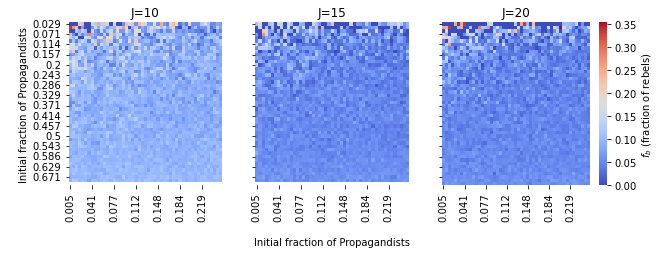

In [5]:
fig, ax = plt.subplots(1,3, sharex=True, sharey=True,gridspec_kw={'width_ratios':[1,1,1.2]})
vmin = min(np.min(dfs_heatmap[0].values), np.min(dfs_heatmap[1].values), np.min(dfs_heatmap[2].values))
vmax = max(np.max(dfs_heatmap[0].values), np.max(dfs_heatmap[1].values), np.max(dfs_heatmap[2].values))

for i, idf in enumerate(dfs_heatmap):
    sns.heatmap(idf, cmap="coolwarm", ax=ax[i],vmin=vmin, vmax=vmax, 
                cbar=False if ax[i]!=ax[-1] else True, 
                cbar_kws=None if ax[i]!=ax[-1] else {'label': r'$f_b$ (fraction of rebels)'},)
    ax[i].set_title(f"J={jail_times[i]}")

fig.set_figheight(3)
fig.set_figwidth(10)
ax[0].set_ylabel("\nInitial fraction of Propagandists")
ax[1].set_ylabel("")
ax[2].set_ylabel("")
ax[0].set_xlabel("")
ax[1].set_xlabel("\nInitial fraction of Propagandists")
ax[2].set_xlabel("")

# Introducing also different L's

In [31]:
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [32]:
df_L = pd.read_pickle("df_50_3_jailtime_4_L.pkl") # Load the dataframe we get from the batch_runner.py script.
df_L

,RunId,iteration,Step,height,width,jail_time,decrease_legit,jail_time_random,percentage_of_cops,percent_of_citizens,government_legitimacy,max_steps,Rebels,Pro-empire,Prisoners,Propagandists,Government Legitemicy,Griviance
0,0,0,100,50,50,10,False,False,0.005102,0.014286,0.8,100,0,0,0,52,0.8,0.097786
1,1,0,100,50,50,10,False,False,0.005102,0.028571,1.0,100,0,1,0,60,1.0,0.000000
2,2,0,100,50,50,10,False,False,0.005102,0.014286,0.5,100,0,0,1,42,0.5,0.237333
3,3,0,100,50,50,10,False,False,0.005102,0.014286,0.2,100,0,0,0,45,0.2,0.373558
4,4,0,100,50,50,10,False,False,0.005102,0.028571,0.8,100,0,3,0,69,0.8,0.100448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28807,28807,0,100,50,50,20,False,False,0.250000,0.700000,0.2,100,212,257,1201,704,0.2,0.395797
28808,28808,0,100,50,50,20,False,False,0.250000,0.657143,1.0,100,0,1503,0,772,1.0,0.000000
28809,28809,0,100,50,50,20,False,False,0.250000,0.671429,1.0,100,0,1561,0,744,1.0,0.000000
28810,28810,0,100,50,50,20,False,False,0.250000,0.685714,1.0,100,0,1660,0,693,1.0,0.000000


## 

In [33]:
# New column dataframe of f_rebels:
df_L["f_rebels"] = df_L["Rebels"].values/(df_L["Pro-empire"].values + df_L["Rebels"].values) # Percentage of rebels in the population
df_L["f_passive"] = df_L["Pro-empire"].values/(df_L["Pro-empire"].values + df_L["Rebels"].values)
# Round so it looks better on the heatmap
df_L.percentage_of_cops = df_L.percentage_of_cops.round(3)
df_L.percent_of_citizens = df_L.percent_of_citizens.round(3)

/var/folders/53/y4sv_ddj50348vcfz2gb0x5r0000gn/T/ipykernel_58791/2234971081.py:2: RuntimeWarning: invalid value encountered in true_divide
  df_L["f_rebels"] = df_L["Rebels"].values/(df_L["Pro-empire"].values + df_L["Rebels"].values) # Percentage of rebels in the population
/var/folders/53/y4sv_ddj50348vcfz2gb0x5r0000gn/T/ipykernel_58791/2234971081.py:3: RuntimeWarning: invalid value encountered in true_divide
  df_L["f_passive"] = df_L["Pro-empire"].values/(df_L["Pro-empire"].values + df_L["Rebels"].values)


In [34]:
L = df_L.government_legitimacy.unique()
L = L[L!=1.0] # Drop L=1.0 there are no Rebels ever!

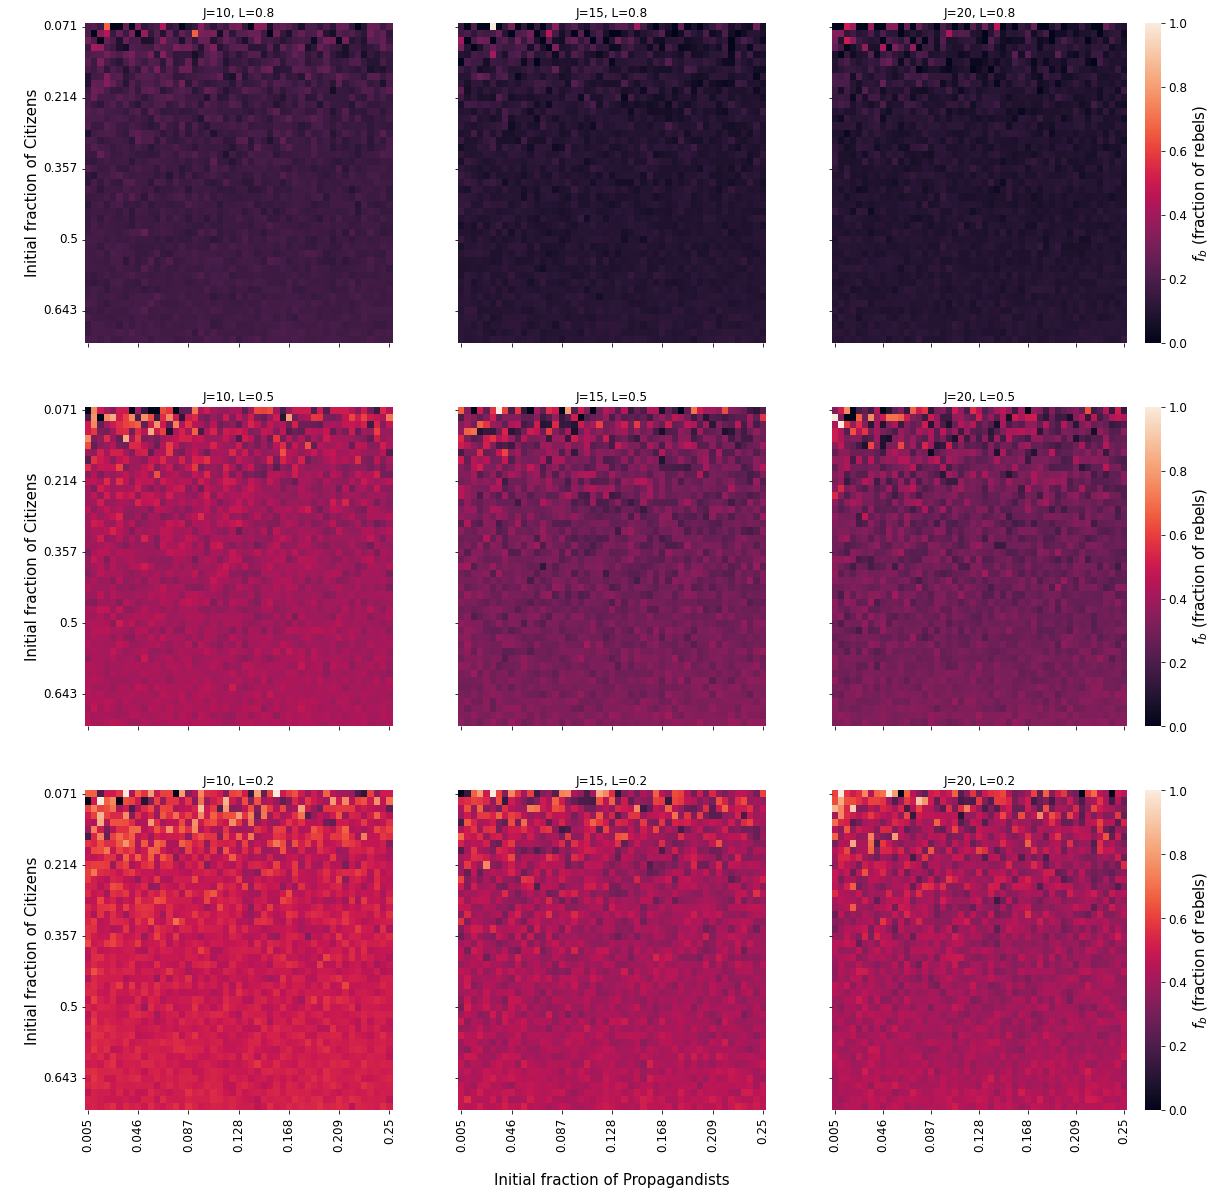

In [35]:
fig, ax = plt.subplots(3,3, sharex=True,sharey=True,gridspec_kw={'width_ratios':[1,1,1.2]})
for j ,government_legit in enumerate(L):
    df_government_legit = df_L[df_L["government_legitimacy"].values == government_legit]
    
    jail_times = df_government_legit.jail_time.unique()
    df_heatmaps = [
        df_government_legit.query(f"jail_time=={jail_time}").pivot(index='percent_of_citizens', 
                                                columns='percentage_of_cops', values='f_rebels')
        for jail_time in jail_times
    ]
    df_heatmaps = [data_frame.dropna() for data_frame in df_heatmaps]
    
    vmin = min(np.min(df_heatmaps[0].values), np.min(df_heatmaps[1].values), np.min(df_heatmaps[2].values))
    vmax = max(np.max(df_heatmaps[0].values), np.max(df_heatmaps[1].values), np.max(df_heatmaps[2].values))
    
    for i, idf in enumerate(df_heatmaps):
        sns.heatmap(idf, ax=ax[j][i],vmin=vmin, vmax=vmax, 
                    cbar=False if ax[j][i]!=ax[j][-1] else True, 
                    cbar_kws=None if ax[j][i]!=ax[j][-1] else {'label': r'$f_b$ (fraction of rebels)'},)
        ax[j][i].set_title(f"J={jail_times[i]}, L={government_legit}")
    ax[j][0].set_ylabel("\nInitial fraction of Citizens")
    ax[j][1].set_ylabel("")
    ax[j][2].set_ylabel("")
    ax[j][0].set_xlabel("") 
    ax[j][1].set_xlabel("" if ax[j][1]!=ax[-1][1] else "\nInitial fraction of Propagandists")
    ax[j][2].set_xlabel("")
fig.set_figheight(20)
fig.set_figwidth(20)
plt.show()

# Plots for L->0

In [36]:
df_Lto0 = pd.read_pickle("df_50_3_jailtime_Lto0.pkl")
df_Lto0

,RunId,iteration,Step,height,width,jail_time,decrease_legit,jail_time_random,percentage_of_cops,percent_of_citizens,government_legitimacy,max_steps,Rebels,Pro-empire,Prisoners,Propagandists,Government Legitemicy,Griviance
0,0,0,100,50,50,10,True,False,0.005102,0.014286,0.85,100,1,0,0,44,1.026347e-08,0.460092
1,1,0,100,50,50,10,True,False,0.010204,0.014286,0.85,100,0,0,0,65,1.026347e-08,0.483273
2,2,0,100,50,50,10,True,False,0.005102,0.028571,0.85,100,0,0,1,85,1.026347e-08,0.486771
3,3,0,100,50,50,10,True,False,0.010204,0.028571,0.85,100,0,1,2,75,1.026347e-08,0.485284
4,4,0,100,50,50,10,True,False,0.005102,0.042857,0.85,100,4,2,0,115,1.026347e-08,0.462255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7198,7198,0,100,50,50,20,True,False,0.250000,0.628571,0.85,100,150,161,1060,817,1.026347e-08,0.509073
7199,7199,0,100,50,50,20,True,False,0.250000,0.657143,0.85,100,189,191,1148,757,1.026347e-08,0.491523
7200,7200,0,100,50,50,20,True,False,0.250000,0.685714,0.85,100,219,194,1160,769,1.026347e-08,0.496255
7201,7201,0,100,50,50,20,True,False,0.250000,0.671429,0.85,100,190,219,1153,745,1.026347e-08,0.499541


In [37]:
df_Lto0["f_rebels"] = df_Lto0["Rebels"].values/(df_Lto0["Pro-empire"].values + df_Lto0["Rebels"].values) # Percentage of rebels in the population
df_Lto0["f_passive"] = df_Lto0["Pro-empire"].values/(df_Lto0["Pro-empire"].values + df_Lto0["Rebels"].values)

# Round so it looks better on the heatmap
df_Lto0.percentage_of_cops =df_Lto0.percentage_of_cops.round(3)
df_Lto0.percent_of_citizens =df_Lto0.percent_of_citizens.round(3)

/var/folders/53/y4sv_ddj50348vcfz2gb0x5r0000gn/T/ipykernel_58791/499818635.py:1: RuntimeWarning: invalid value encountered in true_divide
  df_Lto0["f_rebels"] = df_Lto0["Rebels"].values/(df_Lto0["Pro-empire"].values + df_Lto0["Rebels"].values) # Percentage of rebels in the population
/var/folders/53/y4sv_ddj50348vcfz2gb0x5r0000gn/T/ipykernel_58791/499818635.py:2: RuntimeWarning: invalid value encountered in true_divide
  df_Lto0["f_passive"] = df_Lto0["Pro-empire"].values/(df_Lto0["Pro-empire"].values + df_Lto0["Rebels"].values)


In [38]:
jail_times = df.jail_time.unique()
dfs_heatmap_Lto0 = [
     df_Lto0.query(f"jail_time=={jail_time}").pivot(index='percent_of_citizens', columns='percentage_of_cops', values='f_rebels')
     for jail_time in jail_times
]
dfs_heatmap_Lto0 = [data_frame.dropna() for data_frame in dfs_heatmap_Lto0]

Text(0.5, 12.0, '')

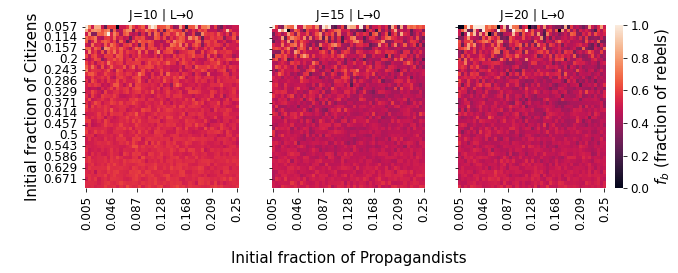

In [39]:
fig, ax = plt.subplots(1,3, sharex=True, sharey=True,gridspec_kw={'width_ratios':[1,1,1.2]})
vmin = min(np.min(dfs_heatmap_Lto0[0].values), np.min(dfs_heatmap_Lto0[1].values), np.min(dfs_heatmap_Lto0[2].values))
vmax = max(np.max(dfs_heatmap_Lto0[0].values), np.max(dfs_heatmap_Lto0[1].values), np.max(dfs_heatmap_Lto0[2].values))

for i, idf in enumerate(dfs_heatmap_Lto0):
    sns.heatmap(idf, ax=ax[i],vmin=vmin, vmax=vmax, 
                cbar=False if ax[i]!=ax[-1] else True, 
                cbar_kws=None if ax[i]!=ax[-1] else {'label': r'$f_b$ (fraction of rebels)'},)
    ax[i].set_title(f"J={jail_times[i]} | "+r"L$\to 0$")

fig.set_figheight(3)
fig.set_figwidth(10)
ax[0].set_ylabel("\nInitial fraction of Citizens")
ax[1].set_ylabel("")
ax[2].set_ylabel("")
ax[0].set_xlabel("")
ax[1].set_xlabel("\nInitial fraction of Propagandists")
ax[2].set_xlabel("")